# MovieLens data examples

Here we explore some data from the MovieLens database (https://grouplens.org/datasets/movielens/). We'll do some exploratory data analysis, visualization, and use some machine learning algorithms.

## Summary of process and tools used

1. Acquire data as csv files from the grouplens website
2. Run Python through Jupyter Notebook
3. Load csv file into pandas dataframe
4. Perform data analysis, visualization, and use machine learning algorithms
5. Control versions and save to Github using Git
6. Done on Mac OS X with Bash shell

## Exploratory data analysis

First we load packages.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
from scipy import stats
import time

Here we load the csv file as a pandas dataframe. We could also load it into a MySQL table and connect to a database, as is done in the mpg_project file. There are some other provided csv files, as explained in the README.txt file.

In [2]:
df_ratings = pd.read_csv('ml-latest-small/ratings.csv')

Here we take a quick look at the header.

In [3]:
print(type(df_ratings))
print(list(df_ratings))

<class 'pandas.core.frame.DataFrame'>
['userId', 'movieId', 'rating', 'timestamp']


Let's take a look at the first five rows to get a feel for the data. The README.txt file included with the csv files explains more about the column fields. In short, userId and movieId ate unique tags, the ratings are from 0.5 to 5 stars in half star increments, and "Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970." 

In [4]:
df_ratings[:5]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


Here's the mean and mode of the ratings. They're a couple notches above the midpoint of the rating system which is $2.75 = (5-0.5)/2+0.5$. It looks like the reviewers are generally positive!

In [5]:
print('%.2f' % df_ratings['rating'].mean())
print(df_ratings['rating'].mode()[0])

3.54
4.0


Here's a plot a graph of the ratings.

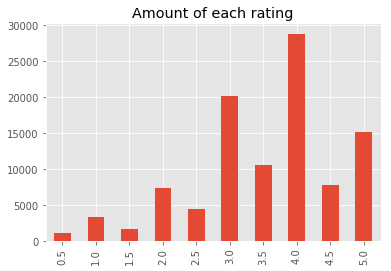

In [6]:
rating_counts = df_ratings['rating'].value_counts()
rating_counts = rating_counts.sort_index()

rating_counts.plot.bar()
plt.title('Amount of each rating')
plt.show()

Let's see how to convert a timestamp to a more recognizable format, and get a sense of the distribution of the reviews over time. The times are recored in Unix Epoch time.

In [7]:
#df_ratings[:1].timestamp[0] #the timestamp of the first entry
print(time.strftime('%Y-%m-%d', time.localtime(df_ratings[:1].timestamp[0]))) #time library
#time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime(df_ratings[:1].timestamp[0])) #alternative

2009-12-13


The range of dates:
1995-01-09 to 2016-10-16

The five highest values:
2000-11-21    1475
2011-01-28    1292
2000-11-20    1055
2016-05-07     910
2005-03-22     725
Name: dates, dtype: int64


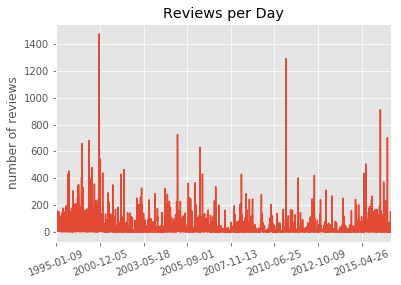

In [8]:
#Count timestamps for each day and plot a graph
df_ratings['dates'] = pd.to_datetime(df_ratings['timestamp'], unit='s').dt.strftime('%Y-%m-%d') #using pandas
print('The range of dates:')
print df_ratings['dates'].min() + ' to ' + df_ratings['dates'].max() + '\n'
date_counts = df_ratings['dates'].value_counts() #series type sorted by values, but we want it by index#Just use count?!
print('The five highest values:')
print(date_counts[:5]) # top 5 values
#type(date_counts) #series object
##http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html
date_counts = date_counts.sort_index() #; character suppresses output the proper idioimatic way?

date_counts.plot() 
plt.xticks(rotation=20)
plt.title('Reviews per Day')
plt.ylabel('number of reviews')
plt.show()

Let's look at the genres and titles. We need to load the separate movies.csv file.

In [9]:
df_movies = pd.read_csv('ml-latest-small/movies.csv')
print(type(df_movies))
print(list(df_movies))
df_movies[:5]

<class 'pandas.core.frame.DataFrame'>
['movieId', 'title', 'genres']


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Now we merge the dataframes based on the movieId column.

In [10]:
df = pd.merge(df_ratings, df_movies, on='movieId')
print(type(df))
print(list(df))
df[909:914] #take a look

<class 'pandas.core.frame.DataFrame'>
['userId', 'movieId', 'rating', 'timestamp', 'dates', 'title', 'genres']


,userId,movieId,rating,timestamp,dates,title,genres
909,654,3671,4.5,1145390260,2006-04-18,Blazing Saddles (1974),Comedy|Western
910,671,3671,3.0,1065149267,2003-10-03,Blazing Saddles (1974),Comedy|Western
911,2,10,4.0,835355493,1996-06-21,GoldenEye (1995),Action|Adventure|Thriller
912,4,10,4.0,949810645,2000-02-06,GoldenEye (1995),Action|Adventure|Thriller
913,7,10,3.0,851869035,1996-12-29,GoldenEye (1995),Action|Adventure|Thriller
